#### **Fetch Data**

In [2]:
import os
import tarfile
import urllib
from math import ceil, log, isqrt, sqrt

DOWNLOAD_ROOT = 'https://github.com/ageron/data/raw/refs/heads/main'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT +'/housing.tgz'

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path): os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, 'housing.tgz')
#     try: urllib.request.urlretrieve(housing_url, tgz_path)
#     except urllib.error.HTTPError as e:
#         print(f'Failed to fetch {housing_url}')
#         print(f"HTTP Error: {e.code} - {e.reason}")
#         return
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
    
# fetch_housing_data()

#### **Load Data**

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing\\housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [4]:
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


*NOTE:*
1. There are some null values in total_bedrooms column.
2. ocean_proximity is a categorical attribute.

In [5]:
from collections import Counter
print(Counter(housing['ocean_proximity']))
# or
housing['ocean_proximity'].value_counts()

Counter({'<1H OCEAN': 9136, 'INLAND': 6551, 'NEAR OCEAN': 2658, 'NEAR BAY': 2290, 'ISLAND': 5})


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### **Visualize Data**

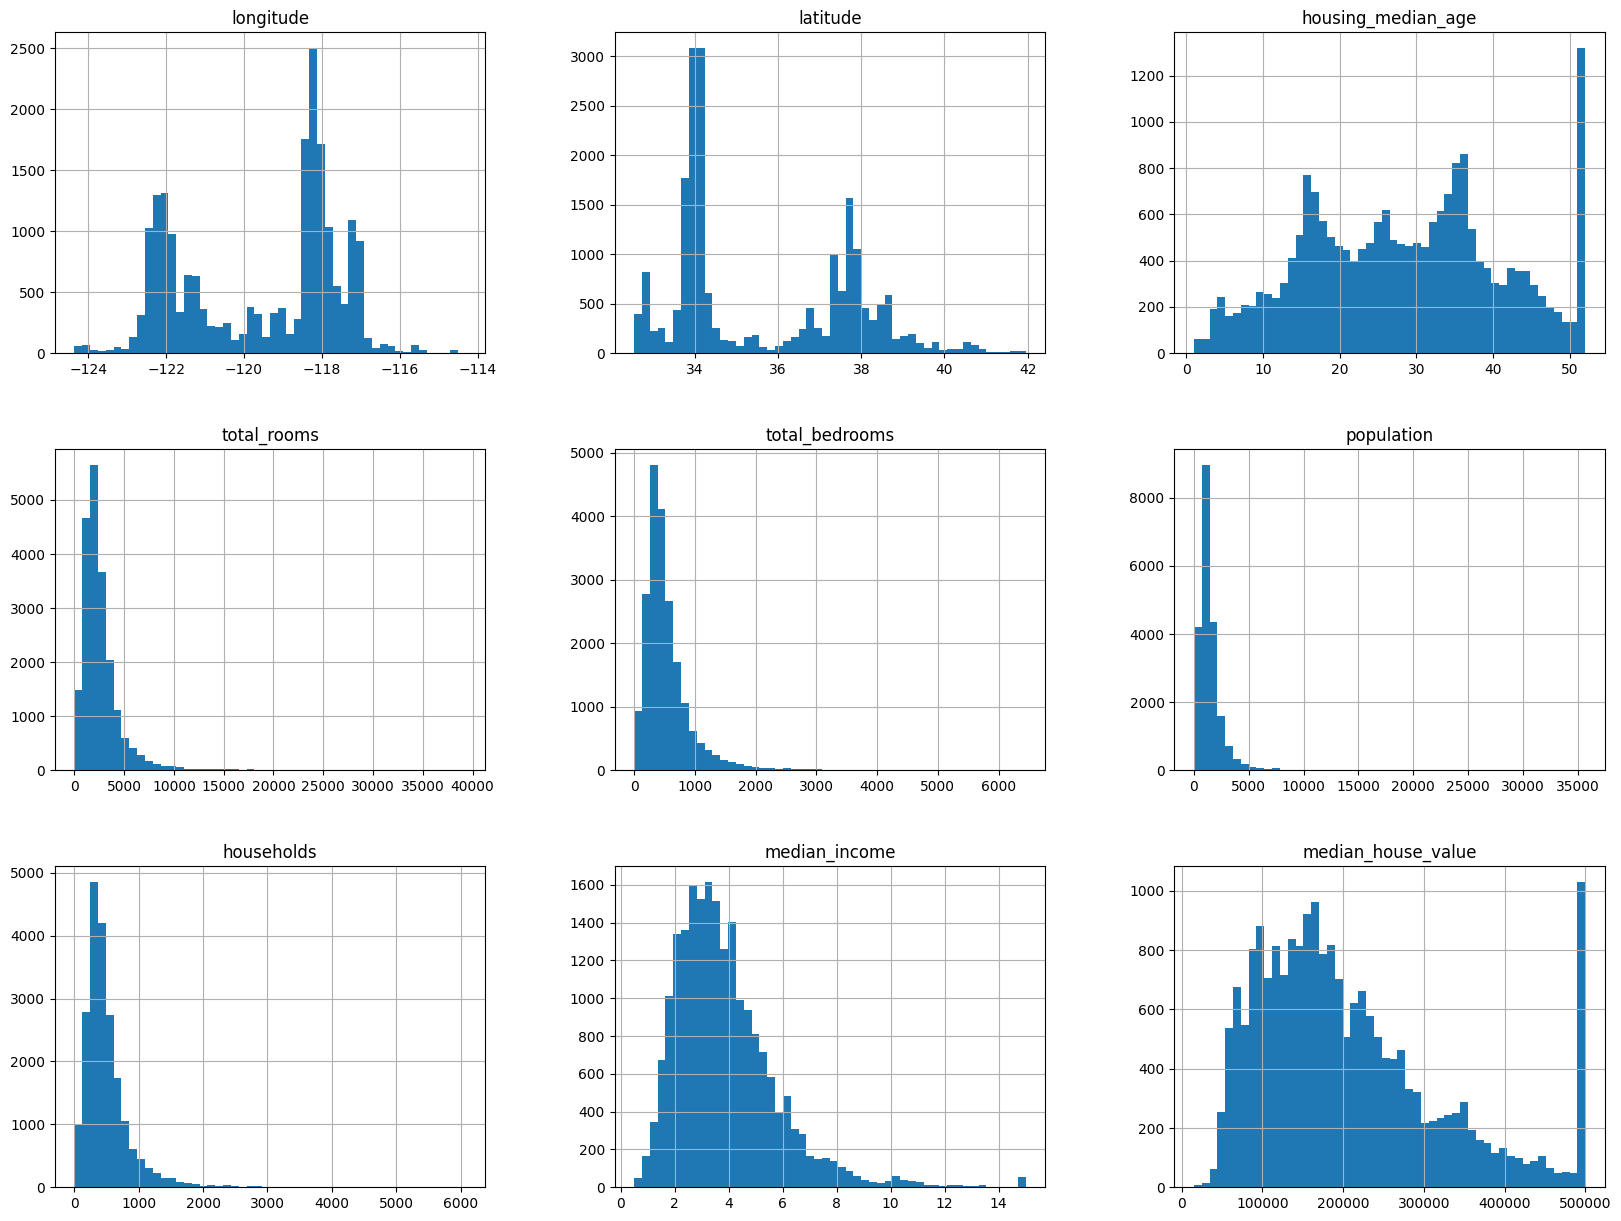

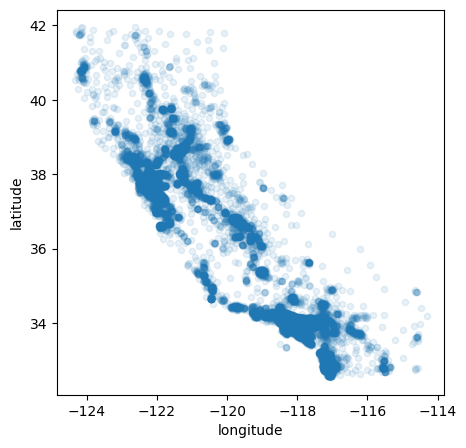

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(5,5))
plt.show()

#### **Creating a Test Set**
1. To randomly split, we can just permut the indexes.
2. To get specific test set, we can use a seeded random generator.  
Another way to achieve 2 is by using  
`sklearn.model_selection.train_test_split` function.

In [8]:
import numpy as np

def split_train_test(data, test_ratio, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices, train_indices = (
        shuffled_indices[:test_set_size], shuffled_indices[test_set_size:])
    return data.iloc[train_indices], data.iloc[test_indices]

train_test, test_set = split_train_test(housing, 0.2)
print(f"Rows in train set: {len(train_test)}\nRows in test set: {len(test_set)}")

rand_train_test, rand_test_set = train_test.copy(), test_set.copy() # to free variables

train_test.head()

Rows in train set: 16512
Rows in test set: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


<Axes: >

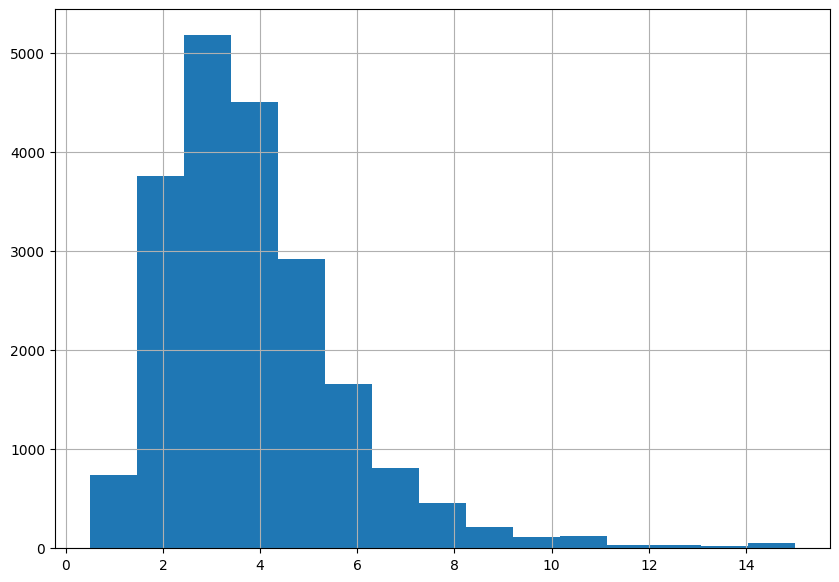

In [9]:
housing['median_income'].hist(bins=15, figsize=(10,7))

**NOTE**  
Sometimes random sampling maybe dangerous. So we divide data based on some specific attribute.  
Here we divide data based on income attribute.  
| Income Category | Overall | Random | Stratified | Rand. %error | Strat. %error |
|-----------------|---------|--------|------------|--------------|-----------------|
| 1.0             | 0.039826| 0.040213| 0.039738   | 0.973236     | -0.219137      |
| 2.0             | 0.318847| 0.324370| 0.318876   | 1.732260     | 0.009032       |
| 3.0             | 0.350581| 0.358527| 0.350618   | 2.266446     | 0.010408       |
| 4.0             | 0.176308| 0.167393| 0.176399   | -5.056334    | 0.051717      |
| 5.0             | 0.114438| 0.109496| 0.114369   | -4.318374    | -0.060464     |

Further we also cap the max value, if we don't cap it, then some categories will have very less data points.


<Axes: >

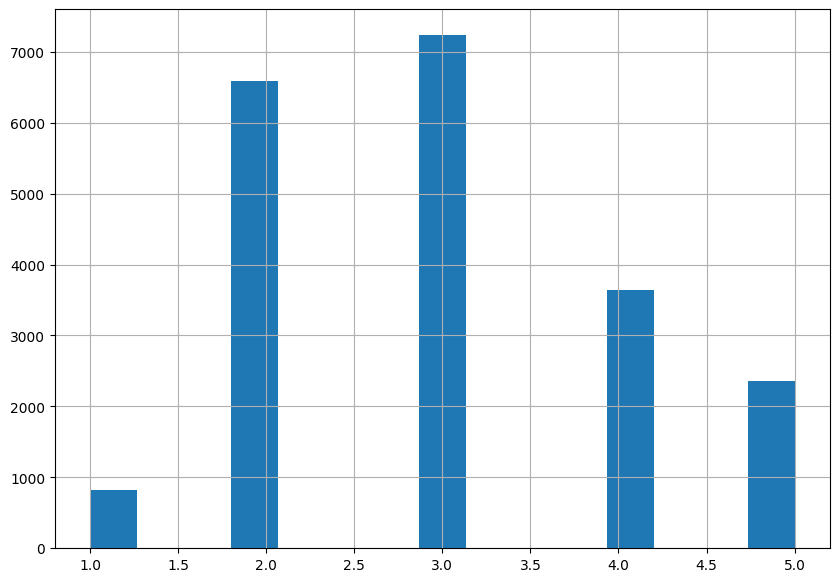

In [10]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'] = housing['income_cat'].apply(lambda x: min(x, 5.0))
housing['income_cat'].hist(bins=15, figsize=(10,7))

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
from collections import Counter
from math import ceil

Rand_Counter = Counter(min(5,ceil(i/1.5)) for i in test_set['median_income'])
Strat_Counter = Counter(strat_test_set['income_cat'])
Original_Counter = Counter(min(5,ceil(i/1.5)) for i in housing['median_income'])

Category_Proportion = pd.DataFrame({
    'Original': {k: v / len(housing) for k, v in Original_Counter.items()},
    'Random Test': {k: v / len(test_set) for k, v in Rand_Counter.items()},
    'Stratified Test': {k: v / len(strat_test_set) for k, v in Strat_Counter.items()},
})
print('Random Sampling Income Category Proportions:')
print(Category_Proportion)

Random Sampling Income Category Proportions:
   Original  Random Test  Stratified Test
5  0.114438     0.120882         0.114341
4  0.176308     0.184109         0.176357
3  0.350581     0.345203         0.350533
2  0.318847     0.307413         0.318798
1  0.039826     0.042393         0.039971


It is clear that stratified sampling gives much better representation of different categories. Hence we will use stratified sampling to create test set.  
Now, we drop income_cat attribute from both test and train set as it is no longer needed.

In [13]:
strat_test_set.drop('income_cat', axis=1, inplace=True)
strat_train_set.drop('income_cat', axis=1, inplace=True)

#### **Further Insights on Data**  
- Exploring the training set
- If training set is big, we may want to sample an exploratory set for analysis. In our case, it is not needed. Regardless we will create a copy of training set to explore and visualize data.  
  
*NOTE-*  
- s = radius of points
- c = color of points
- cmap = color map scheme = {'jet' : rainbow colors, 'viridis' : blue to yellow, 'hot' : black to red to yellow to white, 'coolwarm' : blue to white to red, 'magma' : black to red to yellow to white}
- Linear color scheme is required for this plot, but suppose we wanted custom, we could  
  - `c = np.log(explore_set['median_house_value'])`
  - `from matplotlib.colors import LogNorm`  
    `norm = LogNorm(vmin=explore_set['median_house_value'].min(), vmax=explore_set['median_house_value'].max())`

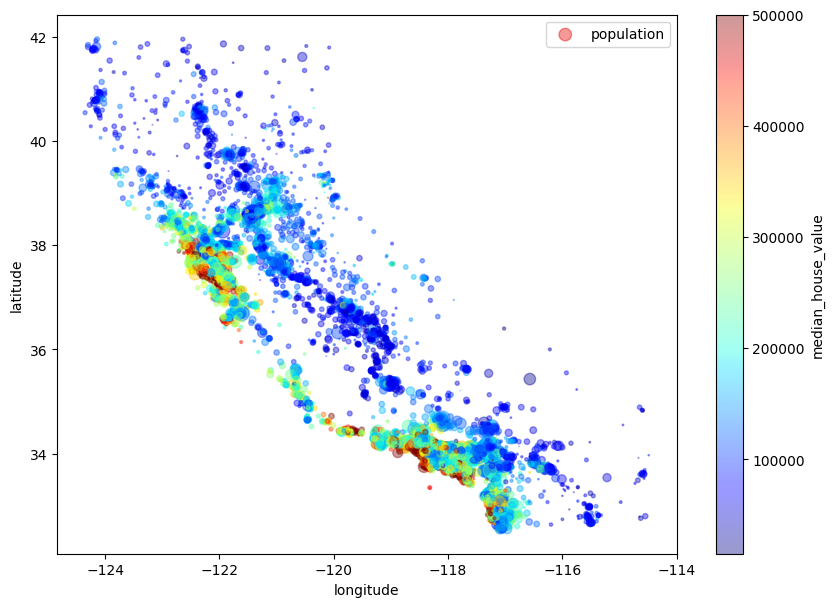

In [14]:
explore_set = strat_train_set.copy()

explore_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                 s=explore_set['population']/100, label="population",
                 c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7)
                 )
plt.show()

- Price ∝ Population Density -> Clustering algorithm may be useful
- Coast proximity is important factor, but not that hard rule, eg. houses near northern coast are cheap.  
  
We can compute the *standard correlation coefficient*  (also called *Pearson's r*) between every pair of attributes using `pandas.DataFrame.corr()` method which computes it for all numerical attributes.  
For Reference:  
<p align='center'> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/960px-Correlation_examples2.svg.png" width="800" alt="Wikipedia Correlation Image"> </p>  
Note that standard correlation coeff. only measures linear relationships. There may be non-linear relationships as well.  Clearly, median_income has the highest correlation with median_house_value.  
  
Clearly, `median_income` is the most important attribute. Let's explore its impact more closely.

In [15]:
corr_matrix = explore_set.drop(columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Clearly, median_income has the highest correlation with median_house_value.  
  
Another way to check how attributes are correlated is to use scatter matrix. It plots every numerical attribute against every other numerical attribute.  
Note - diagonal plots are histograms of individual attributes, as straight lines wouldn't be very informative.

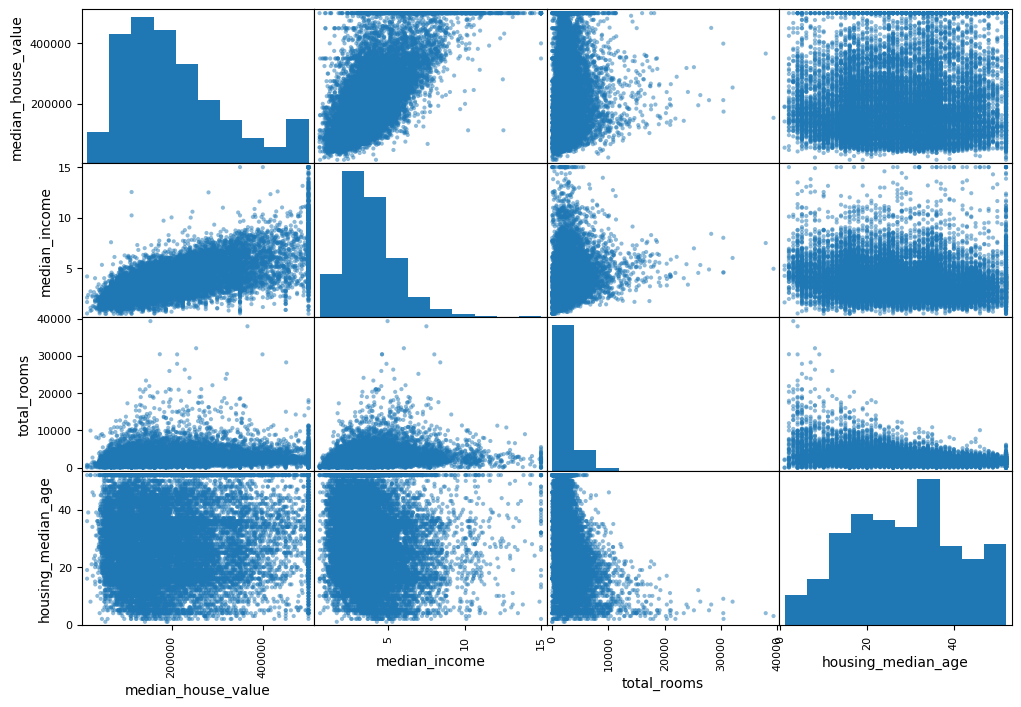

In [16]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(explore_set[attributes], figsize=(12, 8))
plt.show()

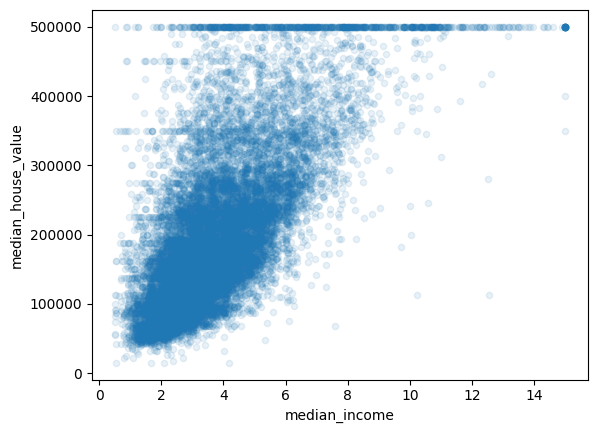

In [17]:
explore_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

Observations - 
- median_income vs median_house_value is clearly very linearly correlated.
- Price cap is clearly visible at 500,000, which was already known.
- But this plot also reveals non-obvious caps at 450,000, 350,000 and 280,000.  
  
We should probably remove these caps to prevent our model from learning these data quirks.  
Also let's have some data per housing.

In [18]:
for data in ['total_rooms', 'total_bedrooms', 'population']:
    explore_set[f'{data.removeprefix('total_')}_ph'] = explore_set[data] / explore_set['households']
    # explore_set.drop(columns=[data], inplace=True)
explore_set['bedrooms_pr'] = explore_set['total_bedrooms'] / explore_set['total_rooms']
explore_set.head(3)
explore_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  rooms_ph            16512 non-null  float64
 11  bedrooms_ph         16344 non-null  float64
 12  population_ph       16512 non-null  float64
 13  bedrooms_pr         16344 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.9+ MB


median_house_value    1.000000
median_income         0.688380
rooms_ph              0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
population_ph        -0.038224
bedrooms_ph          -0.045545
longitude            -0.050859
latitude             -0.139584
bedrooms_pr          -0.256397
Name: median_house_value, dtype: float64


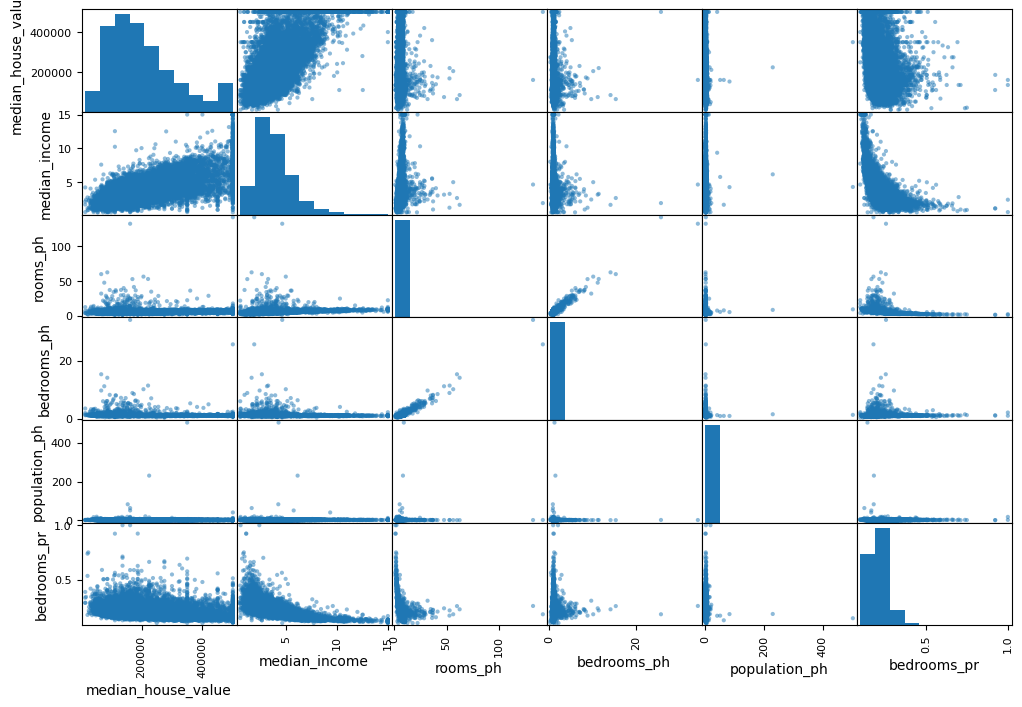

In [19]:
corr_matrix = explore_set.drop(columns=['ocean_proximity']).corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

scatter_matrix(explore_set[['median_house_value', 'median_income', 'rooms_ph', 'bedrooms_ph', 'population_ph', 'bedrooms_pr']], figsize=(12, 8))
plt.show()

Observations -
- `rooms_ph` and `bedrooms_pr` seem to be very useful.

#### **Prepare data for ML**

Problems  
1. Missing values
   - Option 1 - Remove districts with missing values -> may lose too much data
   - Option 2 - Remove the whole attribute -> may lose important info
   - Option 3 - Set some value (0, mean, median, etc) -> may be inaccurate
   - Option 4 - Better way - Use sklearn's `SimpleImputer` class to fill missing values with mean/median/mode.

```py
housing.dropna(subset=["total_bedrooms"])   # option 1 
housing.drop("total_bedrooms", axis=1)      # option 2
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median)    # option 3
```  
But with imputer, we can first train an imputer with strategy such as 'median' on training set and then use it to transform both training and test set. This way we don't have to compute median again and again, even for new data.  

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

explore_set_num = explore_set.drop(columns=['ocean_proximity'])
imputer.fit(explore_set_num)
# imputer.statistics_ ~ df.meadian().values
X = imputer.transform(explore_set_num) # <- Numpy arr
training_set = pd.DataFrame(X, columns=explore_set_num.columns, index=explore_set_num.index)
training_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   rooms_ph            16512 non-null  float64
 10  bedrooms_ph         16512 non-null  float64
 11  population_ph       16512 non-null  float64
 12  bedrooms_pr         16512 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


##### **Categorical Attributes**


Now we need to convert categorical attribute ocean_proximity to numerical values, as most ML algorithms prefer numbers.  
One thing we can do is assign each category an integer value
```py
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
```  
But this approach has a problem. ML algorithms may assume that two nearby values are more similar than two distant values. But here that is not the case.    
So a better approach is to create one binary. So we use `OneHotEncoder` class.

In [21]:
from collections import Counter
print(Counter(explore_set['ocean_proximity']))

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
explore_set_1hot = encoder.fit_transform(explore_set[['ocean_proximity']])
explore_set_1hot.toarray()


Counter({'<1H OCEAN': 7274, 'INLAND': 5301, 'NEAR OCEAN': 2089, 'NEAR BAY': 1846, 'ISLAND': 2})


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

#### **Pipelines**  
- We can create custom transformers by extending `BaseEstimator` and `TransformerMixin` classes from `sklearn.base` module.  
- BaseEstimators allow for `get_params` and `set_params` methods which are useful for hyperparameter tuning and model selection.  
- Feature Scaling - some algo don't perform when various attributes have different scales.
  - Min-Max (Normalization) - f(i) = (f(i) - min) / (max - min)  
    Scales data to [0, 1] range
  - Standardization - f(i) = (f(i) - mean) / std_dev  
    Bad for neural networks which ask for [0,1] or [-1,1] range, but normal algo are okay with it.  
    Centers data around 0 with std deviation of 1.  
    Also normalization depends a lot on single data points (min and max), which may be outliers. 
- We can use `Pipeline` class to chain multiple transformers and estimators together.  
- We will make separate pipelines for numerical and categorical attributes and then combine them using `ColumnTransformer` class.  

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

explore_set_num = explore_set.drop(columns=['ocean_proximity', 'rooms_ph', 'population_ph', 'bedrooms_pr', 'bedrooms_ph'])
# Removing previously added attributes to avoid confusion
rooms_ix, bedrooms_ix, population_ix, households_ix = 4,5,6,7

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else: return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
explore_set_num_extra_attribs = attr_adder.transform(explore_set_num.to_numpy())
explore_set_num_extra_attribs = pd.DataFrame(
    explore_set_num_extra_attribs,
    columns=list(explore_set_num.columns) + ['rooms_ph', 'population_ph', 'bedrooms_pr'],
    index=explore_set_num.index
)

In [23]:
explore_set_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0


In [24]:
explore_set_num_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_ph,population_ph,bedrooms_pr
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,531.281269,492.685948,1.413453
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,58.150995,58.643801,1.881356
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,89.190300,83.436087,2.589862
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,376.249005,344.858078,2.168038
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,343.137255,332.086592,1.578860


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipepline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder())
])

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipepline, cat_attribs)
])

In [26]:
train_set = strat_train_set.copy()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [27]:
train_set_prepared = full_pipeline.fit_transform(train_set)
train_set_prepared.shape

(16512, 16)

#### **Training Model**

1. Linear Regression
   - Basically minimize the MSE using Ordinary Least Squares method.

In [28]:
train_set_prepared_df = pd.DataFrame(
    train_set_prepared.toarray() if hasattr(train_set_prepared, "toarray") else train_set_prepared,
    columns=(list(explore_set_num.drop(columns=['median_house_value']).columns) + ['rooms_ph', 'population_ph', 'bedrooms_pr'] + list(encoder.get_feature_names_out(['ocean_proximity']))),
    index=train_set.index
)
train_set_prepared_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_ph,population_ph,bedrooms_pr,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,2.357870,2.439198,-0.407675,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,-0.724202,-0.706534,-0.272809,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.522005,-0.526852,-0.068592,0.0,1.0,0.0,0.0,0.0


In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_prepared, train_set['median_house_value'])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
some_data = strat_test_set.iloc[:5]
some_labels = strat_test_set['median_house_value'].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(len(strat_test_set), len(train_set_prepared))
print("Predictions:", list(f'{i:.4f}' for i in lin_reg.predict(some_data_prepared)))
print("Labels:     ", list(f'{i:.4f}' for i in some_labels))

4128 16512
Predictions: ['384229.1347', '252373.5309', '373868.3202', '279001.1641', '225561.8580']
Labels:      ['397700.0000', '202900.0000', '310000.0000', '314300.0000', '187500.0000']


In [31]:
from sklearn.metrics import mean_squared_error as mse
train_predictions = lin_reg.predict(train_set_prepared)

lin_mse = mse(train_set['median_house_value'], train_predictions)
(lin_rmse := sqrt(lin_mse))

68197.72668034586

Hmm, well we got an RMSE of around 68628 on training set. Note that range of median_house_value is from 15000 to 500000. So this is not very good. Let's try some other models. The model is underfitting the data.

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_prepared, train_set['median_house_value'])

housing_predictions = tree_reg.predict(train_set_prepared)
tree_mse = mse(train_set['median_house_value'], housing_predictions)
(tree_rmse := sqrt(tree_mse))

0.0

Ok wtf. This is clearly overfitting. It is able to perfectly predict training set. We should check it with train set.  
But we should avoid using train set this early in our quest, so let's just split training set into smaller training set and validation set.

In [33]:
train_train_set, test_train_set = split_train_test(train_set, 0.2)
train_train_set_prepared = full_pipeline.transform(train_train_set)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_train_set_prepared, train_train_set['median_house_value'])
housing_predictions = tree_reg.predict(full_pipeline.transform(test_train_set))
tree_mse = mse(test_train_set['median_house_value'], housing_predictions)
(tree_rmse := sqrt(tree_mse))


72916.27331423583

So, it is infact worse. We can also use cross-validation to get better estimate of generalization error.

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_set_prepared, train_set['median_house_value'],
                         scoring='neg_mean_squared_error', cv=10)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(np.sqrt(-scores))

Scores: [72705.5476944  69533.73345489 73155.54776657 70845.04932832
 70073.16758692 71408.80256654 73751.51841237 72001.31894977
 74036.4666915  73994.89996208]
Mean: 72150.60524133779
Standard deviation: 1558.1876977595252


Let's try Random Forest Regressor.  
This model uses multiple decision trees on various sub-samples of the dataset and averages to improve the predictive accuracy and control over-fitting.  

In [36]:
# from sklearn.ensemble import RandomForestRegressor
# forest_reg = RandomForestRegressor()

# scores = cross_val_score(forest_reg, train_set_prepared, train_set['median_house_value'],
#                          scoring='neg_mean_squared_error', cv=10)

# display_scores(np.sqrt(-scores))

Scores: [50715.56248991 50424.18200841 48575.07159431 50491.42740156
 49991.17800314 50841.53723843 50716.01942745 51648.02229792
 51949.52122755 50477.44943638]
Mean: 50582.997112506324
Standard deviation: 867.7868759579391


above takes 4 min to execute....  
Output:  
```bash
Scores: [50715.56248991 50424.18200841 48575.07159431 50491.42740156
 49991.17800314 50841.53723843 50716.01942745 51648.02229792
 51949.52122755 50477.44943638]
Mean: 50582.997112506324
Standard deviation: 867.7868759579391
```

We can save a model using `joblib` library.  
```py
import joblib
joblib.dump(forest_reg, "forest_reg_model.pkl")
```  
  
```py
my_model_loaded = joblib.load("forest_reg_model.pkl")
```

Fine tuning models -  
Fine tuning means adjusting the hyperparameters to get best results.  
  
We can use `GridSearchCV` class from `sklearn.model_selection` module to search for best hyperparameter combination.  
- `n_estimators` - number of trees in the forest
- `max_features` - max number of features considered for splitting a node
- `max_depth` - max depth of each tree
- `bootstrap` - whether bootstrap samples (random sampling with replacement) is used when building trees. If False, the whole dataset is used to build each tree.  
  
`param_grid` is a list of dictionaries. Each dictionary in the list is a combination of hyperparameters to try.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_set_prepared, train_set['median_house_value'])

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation t

In [39]:
cv_res = grid_search.cv_results_
for mean_score, params in sorted(zip(cv_res['mean_test_score'], cv_res['params'])):
    print(f"{sqrt(-mean_score):.2f} for {params}")

64514.32 for {'max_features': 2, 'n_estimators': 3}
63859.89 for {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
62106.79 for {'max_features': 4, 'n_estimators': 3}
61750.68 for {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
60645.02 for {'max_features': 6, 'n_estimators': 3}
60456.57 for {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
60141.06 for {'max_features': 8, 'n_estimators': 3}
56802.40 for {'max_features': 2, 'n_estimators': 10}
56014.87 for {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
55218.29 for {'max_features': 4, 'n_estimators': 10}
54292.15 for {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
54053.04 for {'max_features': 2, 'n_estimators': 30}
53699.67 for {'max_features': 6, 'n_estimators': 10}
53391.99 for {'max_features': 8, 'n_estimators': 10}
53370.15 for {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
52203.91 for {'max_features': 4, 'n_estimators': 30}
51170.30 for {'max_features': 8, 'n_est

Note that we can also use transformers in `Pipeline` and use `GridSearchCV` to search for best hyperparameters of transformers as well.  

In [43]:
model_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('model', RandomForestRegressor(n_estimators=30, max_features=6))
])

param_grid = {
    'preparation__num__attribs_adder__add_bedrooms_per_room': [True, False],
    'model__n_estimators': [30, 50]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_set, train_set['median_house_value'])

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...imators=30))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__n_estimators': [30, 50, ...], 'preparation__num__attr...__add_bedrooms_per_room': [True, False]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and param

In [44]:
cv_results = grid_search.cv_results_
for mean_score, params in sorted(zip(cv_results['mean_test_score'], cv_results['params'])):
    print(f"{sqrt(-mean_score):.2f} for {params}")

51630.66 for {'model__n_estimators': 30, 'preparation__num__attribs_adder__add_bedrooms_per_room': False}
51544.72 for {'model__n_estimators': 30, 'preparation__num__attribs_adder__add_bedrooms_per_room': True}
51286.48 for {'model__n_estimators': 50, 'preparation__num__attribs_adder__add_bedrooms_per_room': False}
51017.94 for {'model__n_estimators': 50, 'preparation__num__attribs_adder__add_bedrooms_per_room': True}
51012.61 for {'model__n_estimators': 70, 'preparation__num__attribs_adder__add_bedrooms_per_room': False}
50796.22 for {'model__n_estimators': 70, 'preparation__num__attribs_adder__add_bedrooms_per_room': True}


Wait a minute. 70 n_estimators rly gave much better results than 30? Let's try even more.

```py
param_grid = [
    {'n_estimators': [40,70,100], 'max_features': [5,6]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_set_prepared, train_set['median_house_value'])
cv_results = grid_search.cv_results_
for mean_score, params in sorted(zip(cv_results['mean_test_score'], cv_results['params'])):
    print(f"{sqrt(-mean_score):.2f} for {params}")
```  
  
```bash
Executed for 5 mins
```
```py
51641.87 for {'max_features': 5, 'n_estimators': 40}
51207.01 for {'max_features': 6, 'n_estimators': 40}
51158.73 for {'max_features': 5, 'n_estimators': 70}
51129.56 for {'max_features': 5, 'n_estimators': 100}
50913.22 for {'max_features': 6, 'n_estimators': 70}
50713.06 for {'max_features': 6, 'n_estimators': 100}
```

Increasing n_estimators further gives diminishing returns. But time taken keeps increasing by a lot. Let's just set it to 70. And see other factors.

```py
param_grid = [
    {'n_estimators': [70], 'max_depth': [5,20,None]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_set_prepared, train_set['median_house_value'])
cv_results = grid_search.cv_results_
for mean_score, params in sorted(zip(cv_results['mean_test_score'], cv_results['params'])):
    print(f"{sqrt(-mean_score):.2f} for {params}")
```
  
```bash
Executed for 4 mins
```
```py
63563.20 for {'max_depth': 5, 'n_estimators': 70}
51403.66 for {'max_depth': 20, 'n_estimators': 70}
51260.24 for {'max_depth': None, 'n_estimators': 70}
```

We can use other search algorithms such as `RandomizedSearchCV` which is faster for large hyperparameter spaces.  
Or we can use `HalvingGridSearchCV` which is faster as well.

Let's try other models like `GradientBoostingRegressor`, `SVR`, etc.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor()
gbrt.fit(train_set_prepared, train_set['median_house_value'])
gbrt_predictions = gbrt.predict(train_set_prepared)
gbrt_mse = mse(train_set['median_house_value'], gbrt_predictions)
(gbrt_rmse := sqrt(gbrt_mse))

50766.981476632354

In [57]:
s = sorted(zip(gbrt.feature_importances_, list(explore_set_num.columns) + ['rooms_ph', 'population_ph', 'bedrooms_pr'] + list(encoder.get_feature_names_out(['ocean_proximity']))), reverse=True)
for i,v in s: print(f"{i:.4f} - {v}")

0.5662 - median_income
0.1630 - ocean_proximity_<1H OCEAN
0.1035 - population_ph
0.0768 - longitude
0.0402 - latitude
0.0340 - housing_median_age
0.0039 - ocean_proximity_ISLAND
0.0035 - total_rooms
0.0022 - ocean_proximity_NEAR BAY
0.0014 - rooms_ph
0.0014 - population
0.0013 - total_bedrooms
0.0012 - households
0.0011 - median_house_value
0.0003 - bedrooms_pr
0.0000 - ocean_proximity_INLAND


In [75]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
lgr, gbr, abr,hgbr = LinearRegression(), GradientBoostingRegressor(), AdaBoostRegressor(), HistGradientBoostingRegressor()
for reg in [lgr, gbr, abr, hgbr]:
    reg.fit(train_set_prepared, train_set['median_house_value'])
    predictions = reg.predict(train_set_prepared)
    reg_mse = mse(train_set['median_house_value'], predictions)
    reg_rmse = sqrt(reg_mse)
    print(f"{reg.__class__.__name__} RMSE: {reg_rmse:.4f}")

LinearRegression RMSE: 68197.7267
GradientBoostingRegressor RMSE: 50766.9815
AdaBoostRegressor RMSE: 79555.4644
HistGradientBoostingRegressor RMSE: 40335.1319


```py
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(etr, train_set_prepared, train_set['median_house_value'],
                         scoring='neg_mean_squared_error', cv=10)
display_scores(np.sqrt(-scores))
```
  
```bash
Executed for 2 mins  
```
```py
Scores: [51226.27025022 51267.07259232 48991.15567831 52163.18840633
 49850.87559538 50789.04279043 51115.76612754 52541.74227737
 51861.89875873 52055.41649063]
Mean: 51186.242896726195
Standard deviation: 1038.0876135467508
```  
Ok this is much better than Decision Tree but slightly worse than Random Forest. Let's check feature importances.

In [63]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(train_set_prepared, train_set['median_house_value'])
svr_predictions = svr.predict(train_set_prepared)
svr_mse = mse(train_set['median_house_value'], svr_predictions)
(svr_rmse := sqrt(svr_mse))

118103.2980600529

##### **1. Linear Regression**  
- Basically minimize the MSE using Ordinary Least Squares method.
- Tends to underfit the data.
- Use when
  - Linear, features are meaningful.
  - Dataset is small
- Don't use when
  - When data is complex and non-linear.
  
##### **2. Decision Tree Regressor**
- Creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- Tends to overfit the data.
- Use when
  - Dataset is very smal and continous
  - Very little noise
- Don't use when
  - When data is actually linear
  - Too noisy
  
##### **3. Random Forest Regressor**
- Uses multiple decision trees on various sub-samples of the dataset and averages to improve the predictive accuracy and control over-fitting.
- Generally better than Decision Tree Regressor.
- Use when
  - Data is noisy
  - Many features
  
##### **4. Gradient Boosting Regressor**
- Sequential trees, each trying to correct the errors of the previous one, in a gradient descent manner.
- Use when
  - Tablular data
  - Complex non-linear data
  - Interactions matter and strong accuracy
- Don't use when
  - Dataset is very large (training time is high)
  - Dataset is very small (overfitting)

##### **5. Adaboost**
- Sequentially creates weak models that focus on the mistakes of prior models, combining them into a strong model.
- Use when
  - Outliers are rare 
  - Data is clean
- Don't use when
  - Data is noisy
  - Outliers are present

##### **6. XG Boost**
- An optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
- Use when
  - High performance and speed are required
  - Large datasets
- Don't use when
  - Dataset is small
  - Simplicity is preferred

##### **7. Voting Regressor**
- Combines multiple different regression models and averages their predictions to improve accuracy.
- Use when
  - You want to leverage the strengths of multiple models
  - You want to reduce the risk of choosing a poorly performing model
- Don't use when
  - Interpretability is a priority
  - Computational resources are limited

##### **8. Stacking Regressor**
- Combines multiple regression models by training a meta-model on their predictions to improve overall performance.
- Use when
  - You want to capture complex relationships in the data
  - You have diverse base models that perform well individually
- Don't use when
  - The dataset is small (risk of overfitting)
  - Simplicity and interpretability are important

```py
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor

param_grid = {
    "learning_rate": [0.03, 0.05, 0.1],
    "max_iter": [200, 400],
    "max_leaf_nodes": [15, 31, 63],
    "min_samples_leaf": [20, 50],
}

grid_search = GridSearchCV(
    HistGradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(train_set_prepared, train_set['median_house_value'])

for mean_score, params in sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params'])):
    print(f"{mean_score:.4f} for {params}")
```

```bash
Executed for 8 mins
```
```py
0.8070 for {'learning_rate': 0.03, 'max_iter': 200, 'max_leaf_nodes': 15, 'min_samples_leaf': 20}
0.8376 for {'learning_rate': 0.1, 'max_iter': 200, 'max_leaf_nodes': 31, 'min_samples_leaf': 50}
```

In [84]:
hgbr = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=50)
hgbr.fit(train_set_prepared, train_set['median_house_value'])
hgbr_predictions = hgbr.predict(train_set_prepared)
hgbr_mse = mse(train_set['median_house_value'], hgbr_predictions)
(hgbr_rmse := sqrt(hgbr_mse))

37857.68924935604

Now after we know the best model along with its hyperparameters, we can make final pipeline.

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=50)

final_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('model', hgbr)
])

In [86]:
final_pipeline.fit(train_set, train_set['median_house_value'])

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preparation', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers con

#### **Final Model Evaluation**

In [87]:
predictions = final_pipeline.predict(strat_test_set)
final_mse = mse(strat_test_set['median_house_value'], predictions)
(final_rmse := sqrt(final_mse))

47430.72170152532

Note that out final RMSE is around 47000 which is acceptable since california data isn't that good and is good enough predictions.